### imdb 영화리뷰 분류
- https://machinelearningmastery.com/sequence-classification-lstm-recurrent-neural-networks-python-keras/
- IMDB 데이터셋(케라스에 내장된 데이터셋, 숫자로 전처리되어 있음, 17MB 정도의 데이터셋)
- 영화 리뷰 50,000개의 데이터셋
- 학습용 데이터 25,000개와 검증용 데이터 25,000개, 각각 50%는 부정, 50%는 긍정 리뷰로 구성

### 제로패딩
- 제일 긴 문장 벡터를 기준으로 하고, 다른 문장의 빈자리를 0로 채움
- 제일 긴 문장 벡터가 이상치일 경우, cut하기도 함


In [1]:
import numpy as np
from keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

np.random.seed(7)

top_words = 5000 #상위 단어 5000개

# 학습용,검증용 5:5
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=top_words)
print(x_train.shape)
print(x_test.shape)
print(x_train[0])

(25000,)
(25000,)
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 2, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 2, 19, 178, 32]


In [2]:
max_review_length = 500 #리뷰의 최대 길이를 500으로 설정

# 길이가 짧으면 공백으로 채움 : 제로페딩함수 (앞에 채움)
x_train = sequence.pad_sequences(x_train, maxlen=max_review_length)
x_test = sequence.pad_sequences(x_test, maxlen=max_review_length)
print(x_train.shape, x_test.shape, x_train[0])


(25000, 500) (25000, 500) [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0 

In [3]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding

# create the model
embedding_vector_length = 32 # 벡터사이즈, 단어1개를 32개 숫자로 임베딩(타임스텝에 해당됨)

model = Sequential()
model.add(Embedding(top_words, embedding_vector_length, input_length=max_review_length))
    # 임베딩 레이어 Embedding(단어의개수, 벡터크기, 입력사이즈(최대단어개수))
model.add(LSTM(100))  # long short_Term memory  문장을 단어들의 시퀀스로 간주하고 순환레이어의 입력으로 사용
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics =['accuracy'])

hist = model.fit(x_train[:1000], y_train[:1000], epochs=10, batch_size=64)

# final evaluation of the model
scores = model.evaluate(x_train[:1000], y_train[:1000], verbose=1)
print('Accuracy: %.2f%%'% (scores[1]*100))

Epoch 1/10
16/16 [==============================] - 9s 427ms/step - loss: 0.6935 - accuracy: 0.5030
Epoch 2/10
16/16 [==============================] - 7s 426ms/step - loss: 0.6862 - accuracy: 0.6410
Epoch 3/10
16/16 [==============================] - 7s 418ms/step - loss: 0.6581 - accuracy: 0.7030
Epoch 4/10
16/16 [==============================] - 7s 424ms/step - loss: 0.6196 - accuracy: 0.7570
Epoch 5/10
16/16 [==============================] - 7s 428ms/step - loss: 0.4850 - accuracy: 0.8240
Epoch 6/10
16/16 [==============================] - 7s 415ms/step - loss: 0.3898 - accuracy: 0.8720
Epoch 7/10
16/16 [==============================] - 7s 414ms/step - loss: 0.2522 - accuracy: 0.9330
Epoch 8/10
16/16 [==============================] - 7s 424ms/step - loss: 0.1287 - accuracy: 0.9620
Epoch 9/10
16/16 [==============================] - 7s 420ms/step - loss: 0.0604 - accuracy: 0.9860
Epoch 10/10
32/32 [==============================] - 2s 55ms/step - loss: 0.0129 - accuracy: 0.9990


In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 32)           160000    
                                                                 
 lstm (LSTM)                 (None, 100)               53200     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 213301 (833.21 KB)
Trainable params: 213301 (833.21 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [5]:
scores = model.evaluate(x_test[:1000], y_test[:1000], verbose=1)

print("Accuracy: %.2f%%" % (scores[1]*100))

32/32 [==============================] - 2s 58ms/step - loss: 0.7628 - accuracy: 0.7320
Accuracy: 73.20%


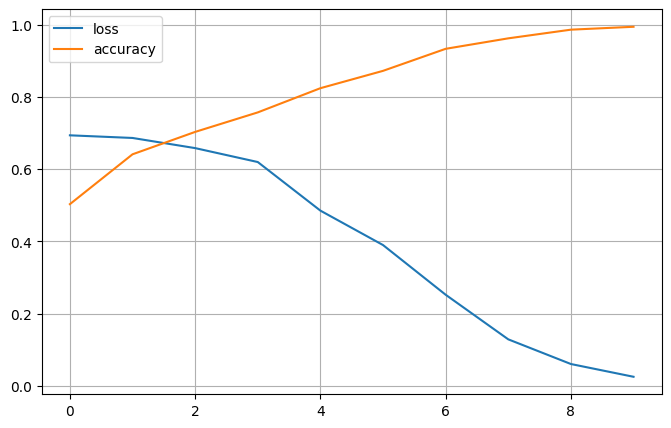

In [6]:
# 모델 학습 과정 표시

import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.plot(hist.history['loss']) #손실
plt.plot(hist.history['accuracy']) #정확도
plt.legend(['loss','accuracy'])
plt.grid()
plt.show()